# Travelling Salesman Problem - Algoritmos géneticos

## Pre-procesamiento de datos

In [1]:
# Importar librerías 

import numpy as np
import pandas as pd
import pygad

In [2]:
# Cargar dataset de distancias

cost_matrix = pd.read_csv('matriz_costos.csv', index_col=0, encoding='latin1')

In [3]:
# Convertir nombres de las ciudades a números para poder usarlos como índices

city_mapping = {city: idx for idx, city in enumerate(cost_matrix.index)}

cost_matrix.index = range(len(cost_matrix))
cost_matrix.columns = range(len(cost_matrix.columns))


In [4]:
cost_matrix

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.000000,5048.119949,1656.053807,1126.497914,5150.608858,2615.243330,2391.775122,1626.762274,1819.093391,3754.690817,...,987.869264,859.898518,439.153442,1705.341614,2131.204457,1760.838604,4464.424239,4132.894624,2958.383711,250.487350
1,5048.119949,0.000000,3361.613411,3910.680533,656.006254,7123.512655,3898.993736,6180.026832,3349.964208,8307.942589,...,4061.927685,5342.955274,4432.797985,6258.593386,2997.521954,3579.513376,1469.668000,914.666325,2653.426051,5298.594513
2,1656.053807,3361.613411,0.000000,1728.076315,3464.102320,3731.446513,873.538944,2793.550690,300.857213,4848.435447,...,669.861543,1950.901919,1040.731843,2799.658030,457.163360,232.552426,2777.917701,2446.388086,1271.889959,1907.087371
3,1126.497914,3910.680533,1728.076315,0.000000,4013.169442,2871.947680,2463.797629,2589.880086,1891.115898,4712.764843,...,1018.629234,652.647919,615.262518,2663.987426,1609.208665,1469.196310,3326.984822,2996.014208,1378.029949,941.208421
4,5150.608858,656.006254,3464.102320,4013.169442,0.000000,7226.001563,4000.923645,6287.546741,3452.453117,8410.431497,...,4163.857594,5445.444183,4535.286893,6361.082294,3100.010863,3696.107670,1571.597909,1017.168020,2755.914959,5401.083421
5,2615.243330,7123.512655,3731.446513,2871.947680,7226.001563,0.000000,5007.018452,4247.036604,3894.486096,4238.754376,...,3021.440431,2219.299761,2690.155670,4861.138513,4206.597162,3472.566508,6539.816944,6208.287330,5034.335416,2364.209766
6,2391.775122,3898.993736,873.538944,2463.797629,4000.923645,5007.018452,0.000000,1727.510843,557.337569,5431.975716,...,1405.023858,2686.623234,1776.453157,3383.185513,1011.673492,783.049071,3315.298025,2983.768411,1608.794305,2642.249685
7,1626.762274,6180.026832,2793.550690,2589.880086,6287.546741,4247.036604,1727.510843,0.000000,2736.145934,3458.136508,...,1799.330492,2807.674690,1902.548401,1408.787305,3268.129553,2396.489249,5601.362122,5265.360508,4095.880594,1882.826838
8,1819.093391,3349.964208,300.857213,1891.115898,3452.453117,3894.486096,557.337569,2736.145934,0.000000,4859.030690,...,832.342127,2113.941503,1203.771426,2809.681487,462.643964,267.141904,2766.268497,2434.738883,1267.911147,2069.567954
9,3754.690817,8307.942589,4848.435447,4712.764843,8410.431497,4238.754376,5431.975716,3458.136508,4859.030690,0.000000,...,3921.462538,3707.962853,4025.433157,2051.424523,5391.014310,4519.374005,7724.246878,7392.717264,6017.743157,2377.320726


## Definición de funciones para el algoritmo genético

In [5]:
# Función fitness para calcular el costo total de viajar a través de todas las ciudades exactamente una vez

def fitness(ga_instance, solution, solution_idx):
    total_cost = 0
    for i in range(len(solution)-1):
        total_cost += cost_matrix[solution[i]][solution[i+1]]
    return 1 / total_cost


In [6]:
# Número de ciudades
num_cities = cost_matrix.shape[0]

# Cada gen representa una ciudad
gene_space = list(range(num_cities))  

# Función de mutación para el intercambio de genes
def mutation(offspring, ga_instance): # offspring es la población de hijos y ga_instance no se usa en este caso, pero se deja por compatibilidad con PyGAD
    for offspring_idx in range(offspring.shape[0]):
        # Intercambiar dos genes al azar
        idx1, idx2 = np.random.choice(range(num_cities), size=2, replace=False)
        offspring[offspring_idx, idx1], offspring[offspring_idx, idx2] = (
            offspring[offspring_idx, idx2],
            offspring[offspring_idx, idx1],
        )
    return offspring

In [7]:
# Función para crear población con permutaciones únicas
def create_population():
    population = []
    for _ in range(64):  # Tamaño de la población
        population.append(np.random.permutation(num_cities))  # Generar permutación única
    return np.array(population)

In [8]:
# Función para crossover ordenado (permite que los hijos tengan los mismos genes que los padres y sin duplicados)
def order_crossover(parents, offspring_size, ga_instance):
    num_genes = parents.shape[1]
    offspring = np.empty(offspring_size, dtype=int)

    for i in range(offspring_size[0]):
        # Seleccionar dos padres para el cruzamiento
        parent1 = parents[i % parents.shape[0]]
        parent2 = parents[(i + 1) % parents.shape[0]]

        # Generar dos puntos de corte al azar
        start, end = sorted(np.random.choice(range(num_genes), size=2, replace=False))

        # Copiar los genes de primer padre al hijo
        offspring[i, start:end + 1] = parent1[start:end + 1]

        # Obtener los genes del segundo padre que no están en el hijo
        parent2_genes = [gene for gene in parent2 if gene not in parent1[start:end + 1]]

        # Asingnar los genes restantes del segundo padre al hijo
        idx = 0
        for j in range(num_genes):
            if start <= j <= end:
                continue  # Acá se salta porque ya se copiaron los genes del primer padre
            if idx < len(parent2_genes):
                offspring[i, j] = parent2_genes[idx]
                idx += 1

    return offspring



## Solución con PyGAD

In [9]:
# Instanciar algoritmo genético
ga_instance = pygad.GA(
    num_generations=2000,                # Número de generaciones
    num_parents_mating=20,              # Número de padres que se cruzarán.
    fitness_func=fitness,                # Función de aptitud
    sol_per_pop=200,                     # Tamaño de la población
    num_genes=num_cities,               # Número de genes (ciudades)
    gene_space=gene_space,              # Espacio de genes
    parent_selection_type="sss",        # Método de selección de padres
    keep_parents=5,                     # Número de padres que se mantienen en la siguiente generación (elitismo)
    crossover_type=order_crossover,            # Tipo de cruce personalizado para evitar cruces inválidos o repetidos
    mutation_type=mutation,       # Porcentaje de genes a mutar
    initial_population=create_population(),  # Función para crear la población inicial
    on_generation=lambda ga: print(f"Generación {ga.generations_completed}: Fitness -> {ga.best_solution()[1]}")  # Imprimir mejor aptitud por generación
)

c:\Users\Stefany\Documents\Académico\Universidad\2024-02\RNA\Trabajo 1\.venv\Lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


In [10]:
# Ejecutar el GA
ga_instance.run()

Generación 1: Fitness -> 1.2050606567792364e-05
Generación 2: Fitness -> 1.2194340236186518e-05
Generación 3: Fitness -> 1.4670005623293154e-05
Generación 4: Fitness -> 1.4670005623293154e-05
Generación 5: Fitness -> 1.4670005623293154e-05
Generación 6: Fitness -> 1.4670005623293154e-05
Generación 7: Fitness -> 1.4670005623293154e-05
Generación 8: Fitness -> 1.4670005623293154e-05
Generación 9: Fitness -> 1.4677167062844707e-05
Generación 10: Fitness -> 1.526207361394842e-05
Generación 11: Fitness -> 1.527393023749221e-05
Generación 12: Fitness -> 1.534650788064665e-05
Generación 13: Fitness -> 1.6820457751240512e-05
Generación 14: Fitness -> 1.6820457751240512e-05
Generación 15: Fitness -> 1.6820457751240512e-05
Generación 16: Fitness -> 1.7283028262237775e-05
Generación 17: Fitness -> 1.813555065785708e-05
Generación 18: Fitness -> 1.813555065785708e-05
Generación 19: Fitness -> 1.9054872877076365e-05
Generación 20: Fitness -> 1.9054872877076365e-05
Generación 21: Fitness -> 1.905487

In [19]:
# Obtener la mejor solución
solution, solution_fitness, solution_idx = ga_instance.best_solution()
optimal_route = [int(city) for city in solution]

# Calcular el costo total de la mejor ruta
total_costs = 1.0 / solution_fitness

In [13]:
reverse_city_mapping = {idx: city for city, idx in city_mapping.items()}
best_route_cities = [reverse_city_mapping[idx] for idx in solution]

print(f"Mejor ruta encontrada:")
print(" -> ".join(best_route_cities))
print(f"Costo total: ${total_costs:.2f}")

Mejor ruta encontrada:
La Paz -> Mexicali -> Hermosillo -> Chihuahua -> San Luis Potosi -> Guanajuato -> Morelia -> Toluca -> Cuernavaca -> Puebla -> Tlaxcala -> Ciudad de Mexico -> Pachuca -> Queretaro -> Ciudad Victoria -> Monterrey -> Saltillo -> Aguascalientes -> Zacatecas -> Durango -> Culiacan -> Tepic -> Guadalajara -> Colima -> Chilpancingo -> Xalapa -> Oaxaca -> Tuxtla Gutierrez -> Villahermosa -> Campeche -> Merida -> Chetumal
Costo total: $29014.79


c:\Users\Stefany\Documents\Académico\Universidad\2024-02\RNA\Trabajo 1\.venv\Lib\site-packages\pygad\visualize\plot.py:109: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  matplotlib.pyplot.legend()


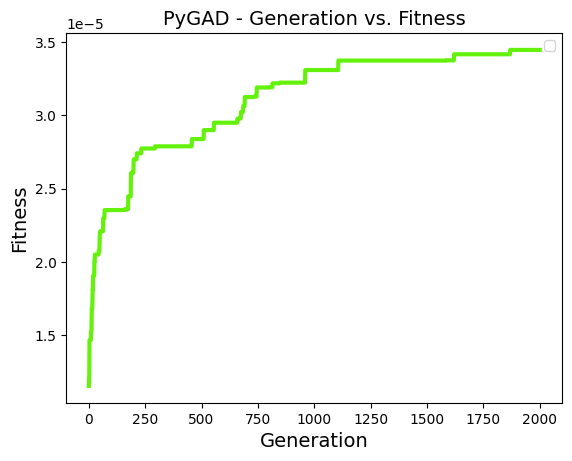

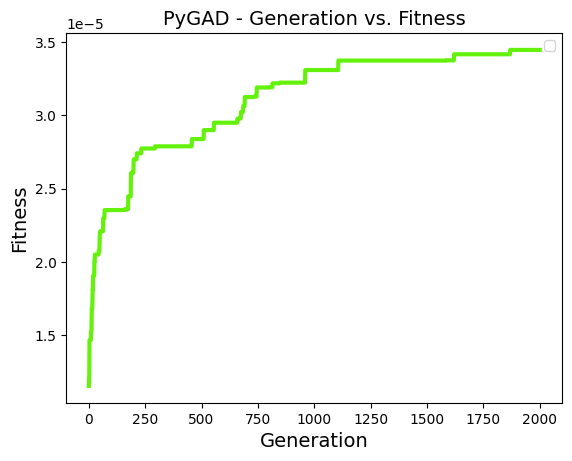

In [14]:
# Gráfica la evolución
ga_instance.plot_fitness()

# GIF de la ruta óptima con Geopandas

In [15]:
import geopandas as gpd
import matplotlib.pyplot as plt
import imageio

In [16]:
# Coordenadas de las ciudades
city_coords = {
    "Aguascalientes": (21.8853, -102.2916),
    "Campeche": (19.8457, -90.5236),
    "Ciudad de Mexico": (19.42847, -99.12766),
    "Ciudad Victoria": (24.2669, -98.8363),
    "Chetumal": (18.5046, -88.3054),
    "Chihuahua": (28.6353, -106.0889),
    "Chilpancingo": (17.5690, -99.5140),
    "Colima": (19.2433, -103.7250),
    "Cuernavaca": (18.9241, -99.2216),
    "Culiacan": (24.8086, -107.3940),
    "Durango": (24.0277, -104.6532),
    "Guadalajara": (20.6597, -103.3496),
    "Guanajuato": (21.0190, -101.2574),
    "Hermosillo": (29.0729, -110.9559),
    "La Paz": (24.1426, -110.3128),
    "Mexicali": (32.6519, -115.4683),
    "Monterrey": (25.6866, -100.3161),
    "Morelia": (19.7033, -101.1920),
    "Merida": (20.9674, -89.5926),
    "Oaxaca": (17.0732, -96.7266),
    "Pachuca": (20.1011, -98.7591),
    "Puebla": (19.0414, -98.2063),
    "Queretaro": (20.5888, -100.3899),
    "Saltillo": (25.4267, -100.9957),
    "San Luis Potosi": (22.1565, -100.9855),
    "Tepic": (21.5087, -104.8956),
    "Tlaxcala": (19.3182, -98.2370),
    "Toluca": (19.3599, -99.6059),
    "Tuxtla Gutierrez": (16.7569, -93.1292),
    "Villahermosa": (17.9895, -92.9376),
    "Xalapa": (19.1738, -96.1342),
    "Zacatecas": (22.7684, -102.5815),
}

# Convertir coordenadas a DataFrame
city_coords_df = pd.DataFrame.from_dict(city_coords, orient='index', columns=['Latitude', 'Longitude'])
city_coords_df['City'] = city_coords_df.index

# Convertir a GeoDataFrame
geometry = gpd.points_from_xy(city_coords_df['Longitude'], city_coords_df['Latitude'])
city_gdf = gpd.GeoDataFrame(city_coords_df, geometry=geometry)

# Cargar un mapa base de México
world = gpd.read_file("ne_110m_admin_0_countries\\ne_110m_admin_0_countries.shp")  
mexico = world[world['NAME'] == 'Mexico']

# Ruta óptima de ejemplo
optimal_route = best_route_cities

# Crear imágenes de la ruta paso a paso
images = []
for i in range(1, len(optimal_route) + 1):
    fig, ax = plt.subplots(figsize=(10, 8))

    # Dibujar el mapa base de México
    mexico.plot(ax=ax, color='lightgrey', edgecolor='black')

    # Dibujar las conexiones hasta el paso actual
    for j in range(i - 1):
        city1 = optimal_route[j]
        city2 = optimal_route[j + 1]
        x = [city_coords[city1][1], city_coords[city2][1]]
        y = [city_coords[city1][0], city_coords[city2][0]]
        ax.plot(x, y, color='blue', linewidth=2, zorder=2)

    # Dibujar las ciudades
    city_gdf.plot(ax=ax, color='red', markersize=50, zorder=3)

    # Etiquetar las ciudades
    for city, row in city_gdf.iterrows():
        ax.text(row['Longitude'] + 0.2, row['Latitude'], row['City'], fontsize=8)

    ax.set_title("Ruta Óptima", fontsize=16)
    ax.set_xlabel("Longitud", fontsize=12)
    ax.set_ylabel("Latitud", fontsize=12)

    # Guardar imagen temporal de cada parada
    filename = f"step_{i}.png"
    plt.savefig(filename, bbox_inches='tight')
    images.append(filename)
    plt.close()

# Crear GIF animado
with imageio.get_writer('optimal_route.gif', mode='I', duration=0.5) as writer:
    for filename in images:
        image = imageio.imread(filename)
        writer.append_data(image)

print("GIF creado: optimal_route.gif")


C:\Users\Stefany\AppData\Local\Temp\ipykernel_18980\1538089809.py:88: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


GIF creado: optimal_route.gif
